# BIG DATA ANALYTICS COURSE

## Quiz 4 Feature Engineering


The attached dataset will be used for this Challenge Quiz.  It contains information on all Pokémon from several generations. The information contained in this dataset includes the following content:

- **name**: The English name of the Pokemon
- **pokedex_number**: The entry number of the Pokemon in the National Pokedex
- **type1**: The Primary Type of the Pokemon
- **type2**: The Secondary Type of the Pokemon
- **total**: Total of hp, attack, defense, sp. atk, sp. def, and speed
- **hp**: The Base HP of the Pokemon
- **attack**: The Base Attack of the Pokemon
- **defense**: The Base Defense of the Pokemon
- **sp_attack**: The Base Special Attack of the Pokemon
- **sp defense**: The Base Special Defense of the Pokemon
- **speed**: The Base Speed of the Pokemon
- **generation**: The numbered generation which the Pokemon was first introduced
- **is_legendary**: Denotes if the Pokemon is legendary

Attachments
  challenge_quiz_4.csv	    42 KB

## 1. How many categorical features are there in the dataset?

In [206]:
import pandas as pd
import numpy as np

#load the data
df = pd.read_csv("challenge_quiz_4.csv")
df.sample(10)



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
320,296,Makuhita,Fighting,NaN,237,72,60,30,20,30,25,3,False
710,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True
610,550,Basculin,Water,NaN,460,70,92,65,80,55,98,5,False
718,650,Chespin,Grass,NaN,313,56,61,65,48,45,38,6,False
225,209,Snubbull,Fairy,NaN,300,60,80,50,40,40,30,2,False
546,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,85,4,False
327,302,SableyeMega Sableye,Dark,Ghost,480,50,85,125,85,115,20,3,False
36,31,Nidoqueen,Poison,Ground,505,90,92,87,75,85,76,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


There are 6 categorical values in the data set (including #), 4 of which are nominal.

## 2. Of the categorical features how many are ordinal type features?
"Generation" can argualbly be considered as categorical (ordinal) because it represents a generation that could have been described as "one" "two"... but has already been encoded in numbers. These numbers can be used to provide some order to the observations and this is why "Generation" is the ordinal type


## 3. Write a function to rescale a numerical-valued feature using min-max scaling. Apply this function to the column named 'Total' and add the resulting column to your original DataFrame. What is the scaled total for the 'Azurill' character?

In [ ]:
# using a function
from sklearn import preprocessing

def rescale(df_column):
    # create scaler
    minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    x = np.array(df_column).reshape(-1, 1)
    
    #apply filter
    column_rescaled = minmax_scaler.fit_transform(x)
    return column_rescaled

(df['Total_rescaled']) = rescale(df['Total']).reshape(1, -1)[0]
print('Original feature:\n {} \nScaled feature:\n {}'.format(df['Total'].head(5), df['Total_rescaled'].head(5)))

In [41]:
# using the scaler directly
from sklearn import preprocessing

# create scaler
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

#transform df column into np.array
total = np.array(df['Total']).reshape(-1, 1)

#apply filter
total_rescaled = minmax_scaler.fit_transform(total)
    
#put the result back into de df
(df['Total_rescaled']) = total_rescaled.reshape(1, -1)[0]

print('Original feature:\n {} \nScaled feature:\n {}'.format(df['Total'].head(5), df['Total_rescaled'].head(5)))

0    0.230000
1    0.375000
2    0.575000
3    0.741667
4    0.215000
Name: Total_rescaled, dtype: float64
Original feature:
 0    318
1    405
2    525
3    625
4    309
Name: Total, dtype: int64 
Scaled feature:
 0    0.230000
1    0.375000
2    0.575000
3    0.741667
4    0.215000
Name: Total_rescaled, dtype: float64


In [51]:
#look for the value 'Azurill' on the name feature
print('the  scaled total for the Azurill character is {}'.format(df['Total_rescaled'][df['Name'] == 'Azurill' ].sum()))



the  scaled total for the Azurill character is 0.016666666666666663


## 4. Using the variance thresholding approach, and considering only these features ['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp. Def', 'Speed'], determine how many of them are dropped when the variance threshold is set at 800?

Approach: 
- use the VarianceThreshold function from scikit learn
- create a numpy array (X) with the 6 features of tha data frame (scikit works with numpy arrays)
- apply the feature selection function to the X array
- look at the resulting array and check how many columns it has aftes the feature selection

In [198]:
from sklearn.feature_selection import VarianceThreshold

#set the variance threshold
sel = VarianceThreshold(threshold=(800))

#create the new nparray
HP = np.array(df['HP']).reshape(-1,1)
At = np.array(df['Attack']).reshape(-1,1)
De = np.array(df['Defense']).reshape(-1,1)
SpAt = np.array(df['Sp. Atk']).reshape(-1,1)
SpDe = np.array(df['Sp. Def']).reshape(-1,1)
Spe =  np.array(df['Speed']).reshape(-1,1)
X = np.hstack((HP, At, De, SpAt, SpDe, Spe))
sel.fit_transform(X)

array([[ 49,  49,  65,  45],
       [ 62,  63,  80,  60],
       [ 82,  83, 100,  80],
       ...,
       [110,  60, 150,  70],
       [160,  60, 170,  80],
       [110, 120, 130,  70]], dtype=int64)

The resulting array has only 4 columns, so 2 features were dropped by the variance selection function

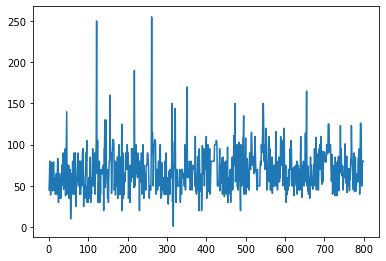

In [87]:
#HP feature gets dropped with this technique. We look into HP data using plots
import matplotlib.pyplot as plt
a= plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
axes.plot(range(0,800), df['HP'])
plt.show()

## 5. Examine the correlation matrix generated condsidering only these features: ['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp. Def', 'Speed']. Which two features demonstrate the greatest linear correlation?


In [89]:
# create a subset dataframe with the specified features
df2 = pd.DataFrame(df,columns=['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

# calculate the correlation matrix
corrMatrix = df2.corr()

print(corrMatrix)

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.175952  0.381240  0.015227  0.473018  0.259133  1.000000


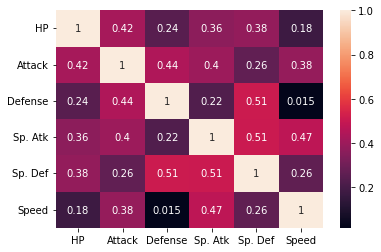

In [90]:
# use the seaborn and matplotlib packages in order to get a visual representation of the correlation matrix.
import seaborn as sn
sn.heatmap(corrMatrix, annot=True)
plt.show()


**Sp.Def** and **Defense**, with a correlation coefficient of .5107,show the greatest linear positive correlation. **Speed** and **Defense** show the greatest negative correlation, which totally makes sense

## 6. Using the NumPy unique function, determine the number of unique Generations represented in the dataset.


In [92]:
df.Generation.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [94]:
np.unique(df.Generation)

array([1, 2, 3, 4, 5, 6], dtype=int64)

## 7. Use pandas one-hot encoding to add new encoded features to the original DataFrame. What is the encoded value for Index = 400.

Pandas has a function which can turn a categorical variable into a series of zeros and ones, which makes them a lot easier to quantify and compare.

That is:

pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)


In [118]:
dummy = pd.get_dummies(df.Generation)

#add the new colum to the dataframe
df = pd.concat([df, dummy], axis=1)
df.head(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,1,2,3,4,5,6
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,0,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1,0,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1,0,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1,0,0,0,0,0


In [121]:
#look into encoded data for index 400
df.iloc[400,:]

#                 365
Name          Walrein
Type 1            Ice
Type 2          Water
Total             530
HP                110
Attack             80
Defense            90
Sp. Atk            95
Sp. Def            90
Speed              65
Generation          3
Legendary       False
1                   0
2                   0
3                   1
4                   0
5                   0
6                   0
Name: 400, dtype: object

Aanother approach is to use the scikit learn function LabelBinarizer

In [196]:
from sklearn.preprocessing import LabelBinarizer

# create one-hot encoder
one_hot = LabelBinarizer()

# one-hot encode feature
one_hot.fit_transform(df.Generation)[400,:]

array([0, 0, 1, 0, 0, 0])

## 8. You may have noticed that there are some missing values in the dataset. Determine whether the missing values correspond to a numerical or categorical feature and then use imputation to replace the NaNs with the corresponding 'most-frequent' value in the column. After imputation, how many occurrences of the most-frequent value are there?

In [127]:
#explore the data set  and find missing values
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
1               0
2               0
3               0
4               0
5               0
6               0
dtype: int64

In [164]:
# type 2 feature has 386 missing values
# in order to replace those missing values with the most frequest values, we use the mode function in pandas
most_frequent = df['Type 2'].mode()

# replace NaNs with the most-frequent value which turns out to be 'Flying'
#df.fillna(most_frequent, inplace = True) Comment: for some reason, fillna() does not seem to work,so use replace() instead

df['Type 2'].replace(np.nan, 'Flying', inplace=True)

#visual inspection
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,1,2,3,4,5,6
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,0,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1,0,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1,0,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1,0,0,0,0,0
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False,1,0,0,0,0,0


In [167]:
# we count the ocurrences of 'Flying'
np.sum([df['Type 2']=='Flying'])


483

## 9. Create a new feature that captures the interaction between the 'Attack' feature and the 'Defense' feature using the PolynomialFeatures functionality of sklearn. What is the mean value of the Attack x Defense interaction feature (choose the closest value)?

Encode the relationship between Attack and Defense by including an interaction feature that is the product of the individual features

In [199]:
#### import from scikit learn
from sklearn.preprocessing import PolynomialFeatures

#create the interaction model
interaction = PolynomialFeatures(degree=2,
              interaction_only=True, include_bias=False)

# use the np.arrays created above (question 4)
features = np.hstack((At, De))

# apply the interaction model
AD = interaction.fit_transform(features)

# get the mean across columns (axis =0). the last element of the resulting array corresponds to the interaction between Attack and Defense
np.mean(AD, axis=0)


array([  79.00125,   73.8425 , 6277.105  ])

In [203]:
np.mean(AD[:,2])

6277.105

## 10. Using the methodology presented in the guided exercise, compute the number of principal components computed using a value for `n_components` of 0.95. What is the result?

We will apply the PCA on the numerical features of the data set. A quick check on the data set structure confirms the features: total, HP, attack, defense, SpAtk, SpDef and speed. Seven features in total.
The approach is the following:
- create the nparray from the pandas dataframe (simila to what was done on question 4, but adding 'total' to the matrix
- standardize the features using scikit learn StandardScaler
- apply PCA to the numpy array
- check the new dimensionality

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
 13  1           800 non-null    uint8 
 14  2           800 non-null    uint8 
 15  3           800 non-null    uint8 
 16  4           800 non-null    uint8 
 17  5           800 non-null    uint8 
 18  6           800 non-null    uint8 
dtypes: bool(1), int64(9), object(3), uint8(6)
memory u

In [191]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a PCA that will retain 95% of variance
pca = PCA(n_components=0.95, whiten=True)

# before using the PCA method, first standardize numerical features
# in question #3 we already created a nparray with the 7 numerical features X. We use the same approach:

# we create the nparray with all components
TO = np.array(df['Total']).reshape(-1,1)
HP = np.array(df['HP']).reshape(-1,1)
At = np.array(df['Attack']).reshape(-1,1)
De = np.array(df['Defense']).reshape(-1,1)
SpAt = np.array(df['Sp. Atk']).reshape(-1,1)
SpDe = np.array(df['Sp. Def']).reshape(-1,1)
Spe =  np.array(df['Speed']).reshape(-1,1)
X = np.hstack((TO, HP, At, De, SpAt, SpDe, Spe))

# Standardize the feature matrix
X_std = StandardScaler().fit_transform(X)

# Conduct PCA
X_pca = pca.fit_transform(X_std)

# Show results
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_pca.shape[1])



Original number of features: 7
Reduced number of features: 5


In [186]:
# visual check
X

array([[318,  45,  49, ...,  65,  65,  45],
       [405,  60,  62, ...,  80,  80,  60],
       [525,  80,  82, ..., 100, 100,  80],
       ...,
       [600,  80, 110, ..., 150, 130,  70],
       [680,  80, 160, ..., 170, 130,  80],
       [600,  80, 110, ..., 130,  90,  70]], dtype=int64)

In [188]:
# visual check of the resulting array after PCA
X_pca

array([[-0.9694325 , -0.16408208,  0.70528602, -0.04172668],
       [-0.24748173, -0.18170745,  0.77267802,  0.00940109],
       [ 0.74889168, -0.16987797,  0.79208392,  0.0587245 ],
       ...,
       [ 1.39490804, -0.87204098,  1.35598683,  0.7929415 ],
       [ 2.07444604, -1.18159052,  0.22709384,  0.72065334],
       [ 1.38642083,  0.46591531,  0.3630513 , -0.17427208]])

In [194]:
# visual check of the standardized array
X_std[0:5,:]

array([[-0.97676549, -0.95062622, -0.92490618, -0.79715364, -0.2391303 ,
        -0.24818854, -0.80150318],
       [-0.25108843, -0.3628221 , -0.5241302 , -0.34791742,  0.21955954,
         0.29115635, -0.28501525],
       [ 0.74984544,  0.42091674,  0.09244823,  0.29384863,  0.83114599,
         1.01028289,  0.40363531],
       [ 1.58395701,  0.42091674,  0.64736882,  1.57738071,  1.50389108,
         1.72940942,  0.40363531],
       [-1.05183553, -1.18574787, -0.83241942, -0.98968346, -0.39202691,
        -0.78753344, -0.11285261]])